### Deep Neural Network


In [60]:
import numpy as np

import pandas as pd

from sklearn.datasets import make_classification

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical

import matplotlib.pyplot as plotter

We will use following 2 function from previous "Deep Neural Netowrk [Binary Classificaiton] (Keras)":

In [61]:
def plot_data_graph(x,y):
    plotter.plot(x[y==0, 0], x[y==0, 1], 'og', alpha=0.5, label=0)
    plotter.plot(x[y==1, 0], x[y==1, 1], 'ob', alpha=0.5, label=1)
    
def plot_loss_and_accuracy_graph(epoch_data):
    epoch_dataframe = pd.DataFrame(epoch_data.history, index=epoch_data.epoch)
    epoch_dataframe.plot(ylim=(0, max(1, epoch_dataframe.values.max())))    

#### Multi-class Data Generator

In [63]:
def generate_multiclass_data(no_data=500, no_dimention=2, no_classes=3):
    np.random.seed(0)
    
    x = np.zeros((no_data * no_classes, no_dimention))
    y = np.zeros(no_data * no_classes)
    
    for j in range(no_classes):
        data_range = range(no_data * j, no_data * (j+1))
        
        radius = np.linspace(0.0, 1, no_data)
        theta = np.linspace(j * 4, (j+1) * 4 , no_data) + np.random.randn(no_data) * 0.2
        
        x[data_range] = np.c_[radius * np.sin(theta), radius * np.cos(theta)]
        y[data_range] = j
    return x, y

#### Plot Multi-class Data Graph

In [64]:
def plot_multiclass_data_graph(x,y):
    plotter.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plotter.cm.RdYlBu, alpha=0.8)

### Training

We will use Softmax Regression which is a generalization for Logistic Regression with multi-class dataset.

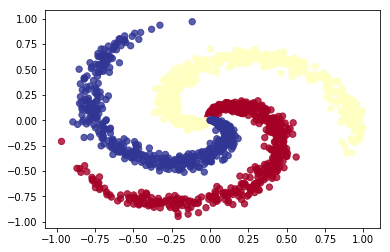

In [65]:
x, y = generate_multiclass_data(no_classes=3)

plot_multiclass_data_graph(x,y)

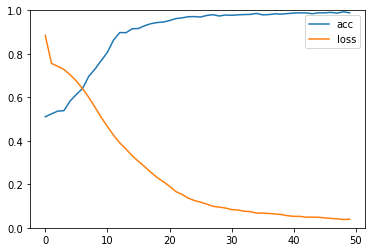

In [68]:
model = Sequential()
model.add(Dense(64, input_shape=(2,), activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(3, activation='softmax'))

model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

y_cat = to_categorical(y)
prediction = model.fit(x, y_cat, verbose=0, epochs=50)
plot_loss_and_accuracy_graph(prediction)

#### Observation
We can observe that dataset with 3 classes have been classified with our deep layer neural network to predict more accurate result with less loss.